# Notebook for plotting & processing pre-reduced GIWAXS data from CMS
Starting with PM7 Random Scalable ex situ GIWAXS Mar2023:

###

In [1]:
### Imports:
import pathlib
import lmfit
from lmfit.models import PseudoVoigtModel, LinearModel, ExponentialModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
# from matplotlib_inline.backend_inline import set_matplotlib_formats
# set_matplotlib_formats('svg')

%matplotlib widget

In [2]:
### Define paths:
basePath = pathlib.Path.cwd()
dataPath = basePath.joinpath('beamline_data/BNL-CMS-Mar2023/AL_giwaxs_analyzed_apr23/AL_chi_linecuts')
# display(dataPath, dataPath.exists())

In [40]:
arr = np.array([[1,2],[3,4],[5,6]])
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

In [39]:
arr_flipped = np.flip(arr)
arr_flipped

array([[6, 5],
       [4, 3],
       [2, 1]])

In [79]:
def plot_txts(filepaths, title_str=None, colors='A123'):
    """
    Inputs: filepaths: iterable of filepaths
    Returns: None, generates matplotlib plot of selected txt files
    """
    plt.close('all')

    if colors=='A123':
        cmap = plt.cm.viridis_r(np.linspace(0.2, 1, 3))
    elif colors=='A3456':
        cmap = plt.cm.cividis(np.linspace(0, 0.9, 4))

    sample_guide = {
    'A1': 'BHJ_PM7-2E1T2:Y12',
    'A2': 'Neat_Y12',
    'A3': 'Neat_PM7-2E1T2',
    'A4': 'Neat PM7-1E1T ',
    'A5': 'Neat PM7-2E1T',
    'A6': 'Neat PM7-1E2T '
    }

    fig, ax = plt.subplots()
    for i, filepath in enumerate(filepaths):
        ### Get filename
        filename = filepath.name[:-7]

        ### Mine metadata from filename
        segments = filename.split('_')
        orientation = segments[1]
        sample = segments[2]
        incidence = segments[3][2:]
        chi_range = segments[5]

        ### Define orientation dict:
        orient_dict = {'Long': 'Perpendicular', 'short': 'Parallel'}

        ### Define conditional for which name to use for q:
        if orientation=='Long':
            qname = 'qx'
        elif orientation=='short':
            qname = 'qy'

        ### Load the data
        Ivsq = np.loadtxt(filepath)

        ### Load as df
        df = pd.DataFrame(data=Ivsq, columns=[f'{qname}', f'{sample_guide[sample]}_th{incidence}_{chi_range}']).set_index(f'{qname}')
        # df = df.loc[:2]

        ### Plot
        if title_str is None:
            df.plot.line(ax=ax, xlabel =f'{qname} [1/Å]', ylabel='Intensity [arb. units]')
        else:
            df.plot.line(ax=ax, xlabel =f'{qname} [1/Å]', ylabel='Intensity [arb. units]', color=cmap[i],
            title=f'{title_str}')
        crs = mplcursors.cursor(ax, multiple=True)
        crs.connect('add', lambda sel: sel.annotation.set_text(f'{qname}={np.round(sel.target[0], 2)}'))

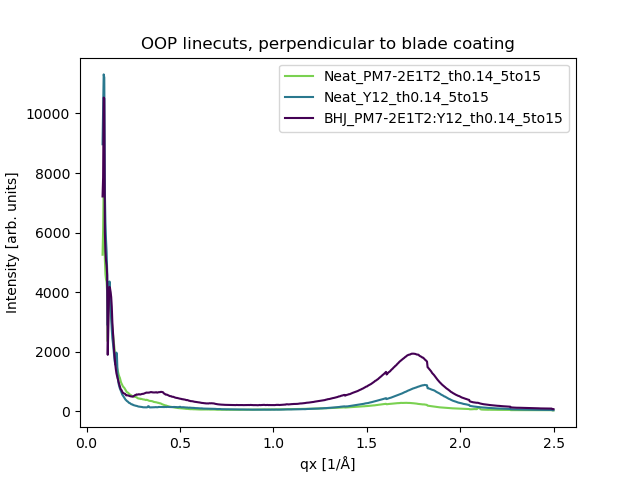

In [69]:
### OOP linecuts, perpendicular to blade coating

filepaths = (list(dataPath.glob('*Long*A3*th0.14*_5to15*')) + 
             list(dataPath.glob('*Long*A2*th0.14*_5to15*')) + 
             list(dataPath.glob('*Long*A1*th0.14*_5to15*')))
plot_txts(filepaths, 'OOP linecuts, perpendicular to blade coating')

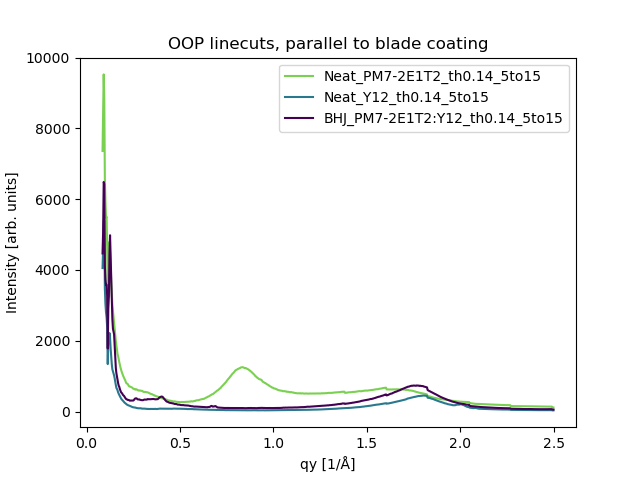

In [52]:
### OOP linecuts, parallel to blade coating

filepaths = (list(dataPath.glob('*short*A3*th0.14*_5to15*')) + 
             list(dataPath.glob('*short*A2*th0.14*_5to15*')) + 
             list(dataPath.glob('*short*A1*th0.14*_5to15*')))
plot_txts(filepaths, 'OOP linecuts, parallel to blade coating')

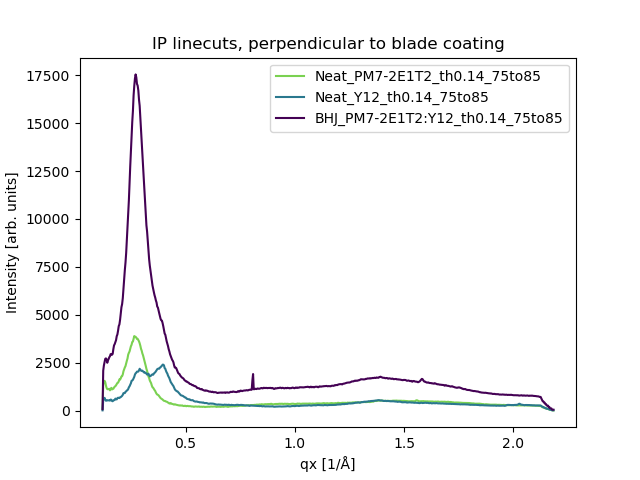

In [53]:
### IP linecuts, perpendicular to blade coating

filepaths = (list(dataPath.glob('*Long*A3*th0.14*_75to85*')) + 
             list(dataPath.glob('*Long*A2*th0.14*_75to85*')) + 
             list(dataPath.glob('*Long*A1*th0.14*_75to85*')))
plot_txts(filepaths, 'IP linecuts, perpendicular to blade coating')

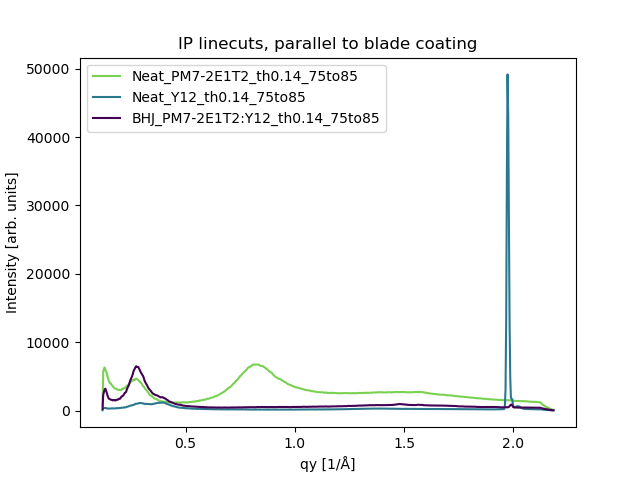

In [82]:
### IP linecuts, parallel to blade coating

filepaths = (list(dataPath.glob('*short*A3*th0.14*_75to85*')) + 
             list(dataPath.glob('*short*A2*th0.14*_75to85*')) + 
             list(dataPath.glob('*short*A1*th0.14*_75to85*')))
plot_txts(filepaths, 'IP linecuts, parallel to blade coating')

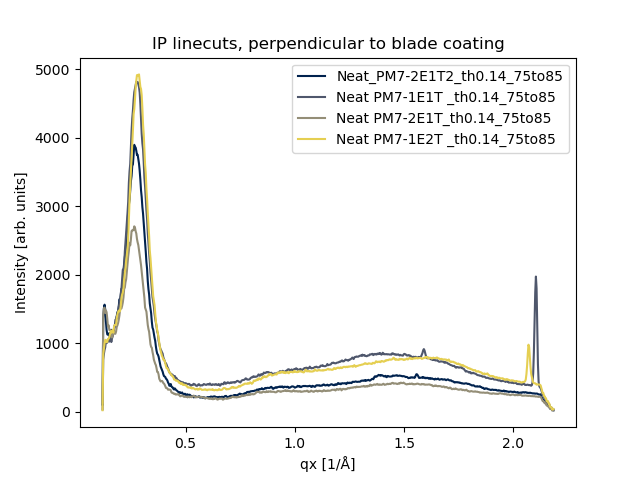

In [80]:
### IP linecuts, perpendicular to blade coating

filepaths = (list(dataPath.glob('*Long*A3*th0.14*_75to85*')) + 
             list(dataPath.glob('*Long*A4*th0.14*_75to85*')) + 
             list(dataPath.glob('*Long*A5*th0.14*_75to85*')) + 
             list(dataPath.glob('*Long*A6*th0.14*_75to85*')))
plot_txts(filepaths, 'IP linecuts, perpendicular to blade coating', 'A3456')

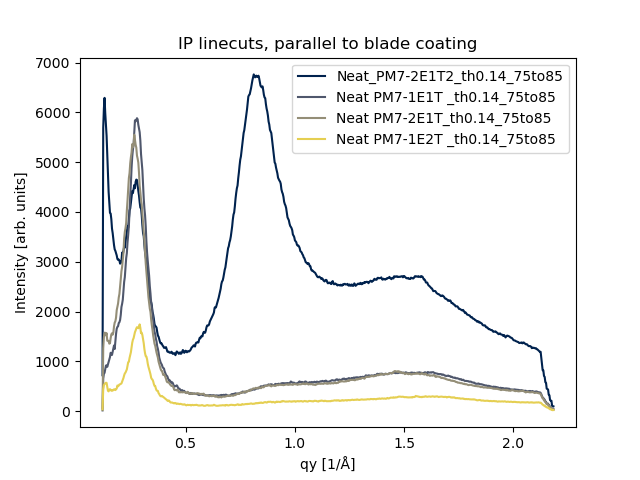

In [83]:
### IP linecuts, parallel to blade coating

filepaths = (list(dataPath.glob('*short*A3*th0.14*_75to85*')) + 
             list(dataPath.glob('*short*A4*th0.14*_75to85*')) + 
             list(dataPath.glob('*short*A5*th0.14*_75to85*')) + 
             list(dataPath.glob('*short*A6*th0.14*_75to85*')))
plot_txts(filepaths, 'IP linecuts, parallel to blade coating', 'A3456')

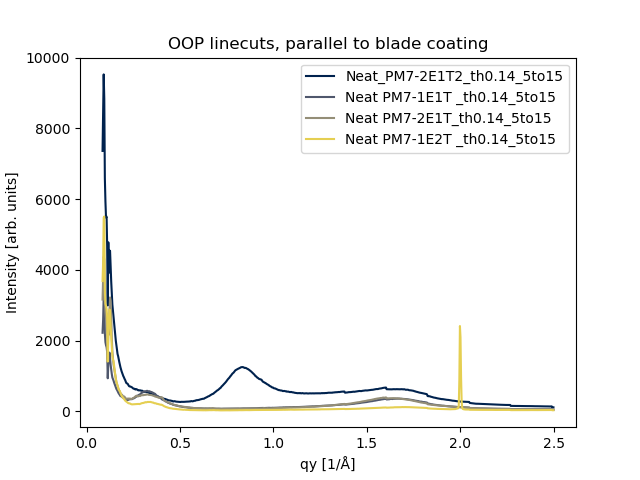

In [84]:
### OOP linecuts, parallel to blade coating

filepaths = (list(dataPath.glob('*short*A3*th0.14*_5to15*')) + 
             list(dataPath.glob('*short*A4*th0.14*_5to15*')) + 
             list(dataPath.glob('*short*A5*th0.14*_5to15*')) + 
             list(dataPath.glob('*short*A6*th0.14*_5to15*')))
plot_txts(filepaths, 'OOP linecuts, parallel to blade coating', 'A3456')

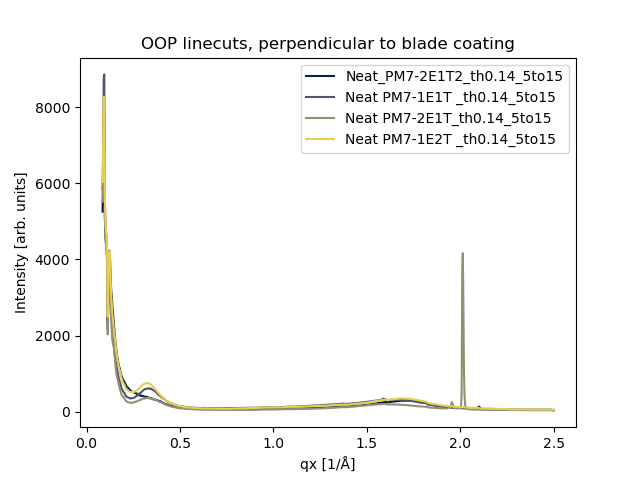

In [85]:
### OOP linecuts, perpendicular to blade coating

filepaths = (list(dataPath.glob('*Long*A3*th0.14*_5to15*')) + 
             list(dataPath.glob('*Long*A4*th0.14*_5to15*')) + 
             list(dataPath.glob('*Long*A5*th0.14*_5to15*')) + 
             list(dataPath.glob('*Long*A6*th0.14*_5to15*')))
plot_txts(filepaths, 'OOP linecuts, perpendicular to blade coating', 'A3456')